# Aula 7 - Caixeiro Viajante


### Instalando as bibliotecas 

https://pyomo.readthedocs.io/en/stable/

In [ ]:
pip install pyomo

     |████████████████████████████████| 8.9MB 7.2MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 


### Importando as bibliotecas

In [ ]:
import pyomo.environ as pyo
import numpy as np
import pandas as pd
from pyomo.environ import *
from pyomo.opt import SolverFactory
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
import matplotlib.pyplot as plt           
import seaborn as sns                    
import warnings 
warnings.filterwarnings("ignore")  


#### Instalando o GLPK

In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up libcolamd2:amd64 (1:5.1.2-2) ...
Setting up libamd2:amd64 

### Importando o dataframe a ser utilizado

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Disciplina Modelagem/Aulas/Aula 7/cvrp_RJ0_toy1_instancia_cluster4', index_col = 0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from math import radians
df['lat_rad'] = df['latitude'].apply(radians)
df['long_rad'] = df['longitude'].apply(radians)

In [ ]:
# importando o pacote de distância e escolhendo a distância
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('haversine')

In [ ]:
# precisamos transformar para array
df[['lat_rad','long_rad']].to_numpy()

array([[-0.39701789, -0.74842984],
       [-0.39772759, -0.74921851],
       [-0.3966326 , -0.74748022],
       [-0.3977492 , -0.74869578],
       [-0.39699883, -0.74852344],
       [-0.39687061, -0.74937008],
       [-0.3969679 , -0.74823189],
       [-0.39680528, -0.74716947],
       [-0.39709594, -0.7478996 ],
       [-0.39716463, -0.74904202],
       [-0.3968901 , -0.74795948],
       [-0.39712629, -0.74848462],
       [-0.39704211, -0.74818184],
       [-0.39730161, -0.74798599],
       [-0.39673632, -0.74941432],
       [-0.39720158, -0.74910572],
       [-0.39701989, -0.74837839],
       [-0.39702738, -0.74845472],
       [-0.39739695, -0.74938337],
       [-0.39688458, -0.74789934],
       [-0.39676161, -0.74782715],
       [-0.39647792, -0.74950425],
       [-0.39737148, -0.74957958],
       [-0.39711109, -0.74837049],
       [-0.39706339, -0.7478235 ],
       [-0.39749032, -0.74912913],
       [-0.39699884, -0.74789917],
       [-0.39672407, -0.74796093],
       [-0.39705731,

In [ ]:
# distância euclidiana - multiplicar por 6373 para passar para Km
dist.pairwise(df[['lat_rad','long_rad']].to_numpy())*6373

array([[ 0.        ,  6.47582945,  6.09786043, ...,  0.1557263 ,
         4.60322007,  4.28538414],
       [ 6.47582945,  0.        , 12.37174387, ...,  6.55802415,
        10.48611299, 10.27277669],
       [ 6.09786043, 12.37174387,  0.        , ...,  6.07087633,
         2.20870309,  5.13043419],
       ...,
       [ 0.1557263 ,  6.55802415,  6.07087633, ...,  0.        ,
         4.62466363,  4.14281857],
       [ 4.60322007, 10.48611299,  2.20870309, ...,  4.62466363,
         0.        ,  5.33387573],
       [ 4.28538414, 10.27277669,  5.13043419, ...,  4.14281857,
         5.33387573,  0.        ]])

In [ ]:
## Finalmente
distancia1 = pd.DataFrame(dist.pairwise(df[['lat_rad','long_rad']].to_numpy())*6373)

Tivemos que diminuir um pouco o problema para que o GLPK 

In [ ]:
distancia2 = distancia1.loc[0:6,0:6]
distancia2

,0,1,2,3,4,5,6
0,0.000000,6.475829,6.097860,4.915668,0.563399,5.605416,1.206249
1,6.475829,0.000000,12.371744,3.074381,6.185008,5.533697,7.553542
2,6.097860,12.371744,0.000000,10.083234,6.561006,11.211598,4.907799
3,4.915668,3.074381,10.083234,0.000000,4.888189,6.859537,5.676643
4,0.563399,6.185008,6.561006,4.888189,0.000000,5.042778,1.724860
5,5.605416,5.533697,11.211598,6.859537,5.042778,0.000000,6.718443
6,1.206249,7.553542,4.907799,5.676643,1.724860,6.718443,0.000000


In [ ]:
n = len(distancia2)

Text(0, 1, 'Latitude')

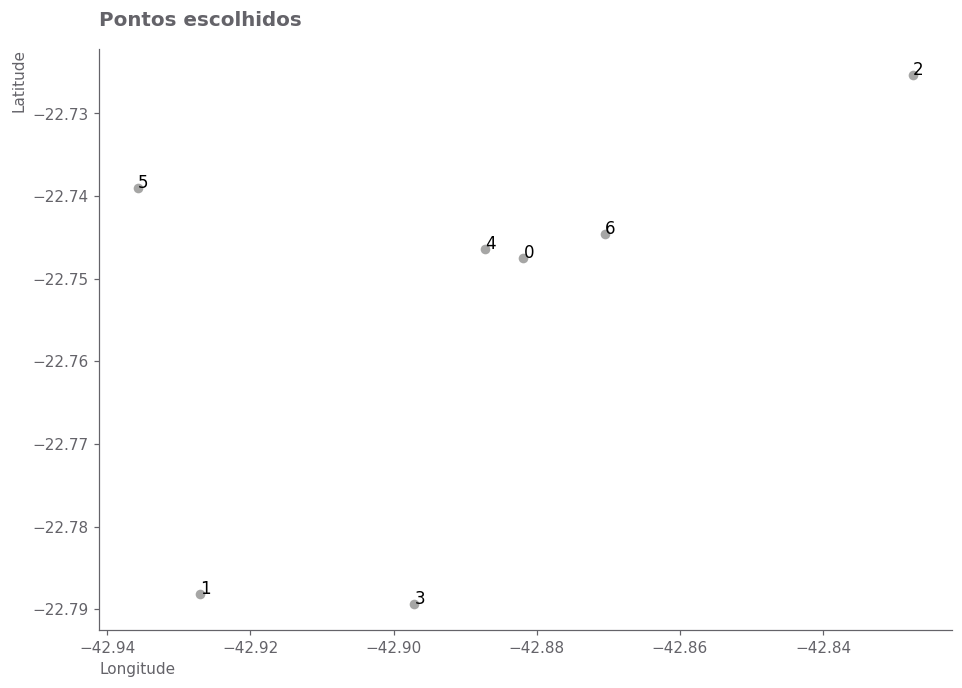

In [ ]:
# Gráfico dos pontos 
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# 2 - Plot
# Gráfico de dispersão - total_bill (x), tip (y) de df1 
sns.scatterplot(data = df.loc[0:len(distancia2)-1,:], x = "longitude", y = "latitude", s = 40, linewidth = 0, color = '#A6A6A5' , ax = ax)    # cor opcional

for i in distancia2.index:
    ax.text(df.loc[i,'longitude'], df.loc[i,'latitude'], str(i), color='black', fontsize=11)
#     plt.annotate(str(i),(df.loc[i,'longitude'], df.loc[i,'latitude']))
    
# 3 - Título
# Inserindo título no nosso eixo ax
ax.set_title('Pontos escolhidos', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')


# ---------------------------------------------------------------------------------------
#                    Melhorando o aspecto do gráfico:
# ---------------------------------------------------------------------------------------

# Modificar a cor dos tiques para cinza (colocar uma cor mais clara - chamar menos atenção):
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines


# Remoção de eixos desnecessários (Closure):
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior

# Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo

# Modificar o label
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')

### Caixeiro Viajante

Desrocher, M., Laporte, G., Improvements and extensions to the Miller-Tucker-Zemlin subtour elimination constraints, Operations Research Letters, 10, 27-36, 1991. 

https://www.sciencedirect.com/science/article/pii/0167637791900832


### Modelo Matemático

**Conjunto das cidades:**

$i,j \in N$

<br>

**Parâmetros:**

$ dist_ij \rightarrow$ distancia da cidade $i$ até $j$ 
$ c_ij \rightarrow$ custo da cidade $i$ até $j$ 

<br>

**Variáveis de decisão:**

$ x_{ij} \rightarrow \{0,1\} $

$ 1 \leq u_i \leq n-1 \quad (i = 2, ... ,n \rightarrow \quad i\neq j) $
<br>

**Função objetivo:**

$ Min \displaystyle\sum_{i \neq j} c_{ij}x_{ij}$

<br>

Sujeito a:

$\displaystyle\sum_{j \in M} x_{ij} = 1 \quad\forall \:i \in N \quad i\neq j $

$\displaystyle\sum_{i \in N} x_{ij} = 1 \quad\forall \:j \in M \quad i\neq j $

MTZ:

$ u_i - u_j + (n - 1)x_{ij} \leq n-2 $





#### Conjuntos das Cidades 

#### Variáveis de decisão

#### Custo (no caso apenas a distância)

#### Função Objetivo 

$ Min \displaystyle\sum_{i \neq j} c_{ij}x_{ij}$

#### Restrições

(R1)

$\displaystyle\sum_{j \in M} x_{ij} = 1 \quad\forall \:i \in N \quad i\neq j $

(R2)

$\displaystyle\sum_{i \in N} x_{ij} = 1 \quad\forall \:j \in M \quad i\neq j $

(R3)

$ u_i - u_j + (n - 1)x_{ij} \leq n-2 $

#### Resolver 

In [ ]:
# 2 - Gráfico de Dispersão  (Scatterplot)

# ---------------------------------------------------------------------------------------
#                             Elementos básicos:
# ---------------------------------------------------------------------------------------

# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# 2 - Plot
# Gráfico de dispersão - total_bill (x), tip (y) de df1 
sns.scatterplot(data = df.loc[0:len(distancia2),:], x = "longitude", y = "latitude", s = 40, linewidth = 0, color = '#A6A6A5' , ax = ax)    # cor opcional

for i in distancia2.index:
    ax.text(df.loc[i,'longitude'], df.loc[i,'latitude'], str(i), color='black', fontsize=11)
#     plt.annotate(str(i),(df.loc[i,'longitude'], df.loc[i,'latitude']))

for i,j in resultados:
    plt.plot([df.longitude[i], df.longitude[j] ],[ df.latitude[i], df.latitude[j] ],color="blue",alpha=0.3)

    
#     plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="blue",alpha=0.3)
    
# 3 - Título
# Inserindo título no nosso eixo ax
ax.set_title('Rotas', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')


# ---------------------------------------------------------------------------------------
#                    Melhorando o aspecto do gráfico:
# ---------------------------------------------------------------------------------------

# Modificar a cor dos tiques para cinza (colocar uma cor mais clara - chamar menos atenção):
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines


# Remoção de eixos desnecessários (Closure):
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior

# Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo

# Modificar o label
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')


